In [68]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
import os
import pandas as pd

In [69]:
def load_data_from_csv(csv_file):
    data = pd.read_csv(csv_file)
    x = data[['ax', 'ay', 'az', 'gx', 'gy', 'gz']].values
    y = data['Label'].values
    y2= data['Body_Head'].values
    return x, y, y2

In [70]:
dataset_path = '/kaggle/input/hardataset/Dataset/'
person_folders = os.listdir(dataset_path)
print(person_folders)

df = pd.DataFrame()
df_list = []

['P3', 'P5', 'P1', 'P2', 'P6', 'P4']


In [71]:
for i in range(len(person_folders)):
    person_folder = person_folders[i]
    csv_file_path = dataset_path + person_folder + '/'
    csv_files = os.listdir(csv_file_path)

    for j in range(len(csv_files)):
        csv_file = csv_files[j]
        #print(csv_file)

        data_frame = pd.read_csv(csv_file_path + '/' + csv_file, index_col=None, header=None)
        df_list.append(data_frame)

df = pd.concat(df_list, axis = 0, sort= True, ignore_index = True)
df.columns = ['Timestamp', 'ax', 'ay', 'az', 'gx', 'gy', 'gz', 'Label', 'activity']

In [72]:
# Define a function to map activity labels to body parts
# Head =0    body =1
labels_activity = df['activity']
def map_body_part(activity_label):
    if activity_label in ['Eating', 'Head Shake','Nodding']:
        return 0
    elif activity_label in ['Walking', 'Speaking', 'Speak and Walk','Staying']:
        return 1
    

# Create the body part column based on the activity labels
df['Body_Head'] = df['activity'].map(map_body_part)

In [73]:
df['Label'].unique()

array([5, 2, 3, 4, 6, 1, 7])

In [74]:
df.head(10)

,Timestamp,ax,ay,az,gx,gy,gz,Label,activity,Body_Head
0,1.564040e+12,-0.952393,0.288086,-0.174316,-8.841463,-7.439024,6.676829,5,Walking,1
1,1.564040e+12,-0.951172,0.289673,-0.173218,-8.750000,-7.439024,7.256098,5,Walking,1
2,1.564040e+12,-0.950317,0.290161,-0.200806,-9.420732,-7.225610,16.006098,5,Walking,1
3,1.564040e+12,-0.950195,0.288696,-0.196899,-9.451220,-7.103659,16.493902,5,Walking,1
4,1.564040e+12,-0.952148,0.289307,-0.193115,-8.506098,-7.286585,17.073171,5,Walking,1
5,1.564040e+12,-0.952026,0.289551,-0.190186,0.060976,-7.469512,17.500000,5,Walking,1
6,1.564040e+12,-0.948730,0.293213,-0.188843,2.195122,-15.670732,18.262195,5,Walking,1
7,1.564040e+12,-0.945679,0.296143,-0.190430,3.384146,-7.378049,18.567073,5,Walking,1
8,1.564040e+12,-0.945068,0.269531,-0.190918,-3.597561,-5.609756,17.987805,5,Walking,1
9,1.564040e+12,-0.946045,0.271851,-0.191650,-3.536585,-4.908537,17.408537,5,Walking,1


In [75]:
df.to_csv("data_har.csv")

In [76]:
X,y_activity,y_head_below_head = load_data_from_csv('/kaggle/working/data_har.csv')

In [77]:
np.unique(y_head_below_head)

array([0, 1])

In [78]:
# Split data for pre-training and fine-tuning
X_train, X_finetune, y_train, y_finetune = train_test_split(X, y_head_below_head, test_size=0.2, random_state=42)

In [79]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [80]:
# Pre-training model
pretrain_model = Sequential([
    Input(shape=(6,)),
    Dense(64, activation='relu'),
#     Dropout(0.125),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [81]:
pretrain_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [82]:
pretrain_model.build(input_shape=(None, 6))  # Use an appropriate input shape (None for batch size)

# Print the model summary
pretrain_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 64)                448       
                                                                 
 dense_29 (Dense)            (None, 32)                2080      
                                                                 
 dense_30 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


In [83]:
# Training the pretrain_model with validation
history=pretrain_model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/50
1059/1059 [==============================] - 3s 2ms/step - loss: 0.5686 - accuracy: 0.7489 - val_loss: 0.4963 - val_accuracy: 0.7564
Epoch 2/50
1059/1059 [==============================] - 2s 2ms/step - loss: 0.4440 - accuracy: 0.7928 - val_loss: 0.4046 - val_accuracy: 0.8141
Epoch 3/50
1059/1059 [==============================] - 2s 2ms/step - loss: 0.3844 - accuracy: 0.8248 - val_loss: 0.3585 - val_accuracy: 0.8345
Epoch 4/50
1059/1059 [==============================] - 2s 2ms/step - loss: 0.3531 - accuracy: 0.8389 - val_loss: 0.3383 - val_accuracy: 0.8483
Epoch 5/50
1059/1059 [==============================] - 2s 2ms/step - loss: 0.3283 - accuracy: 0.8533 - val_loss: 0.3284 - val_accuracy: 0.8545
Epoch 6/50
1059/1059 [==============================] - 2s 2ms/step - loss: 0.3059 - accuracy: 0.8660 - val_loss: 0.2898 - val_accuracy: 0.8752
Epoch 7/50
1059/1059 [==============================] - 2s 2ms/step - loss: 0.2814 - accuracy: 0.8799 - val_loss: 0.2763 - val_accuracy:

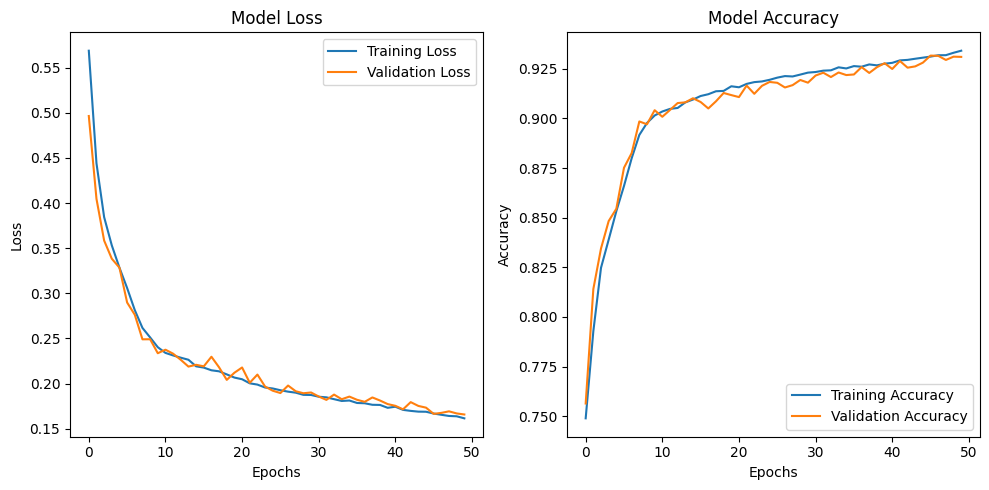

In [84]:
# Plot training & validation loss values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [85]:
pretrain_model.pop()
for layer in pretrain_model.layers:
    layer.trainable = False

activity_model = Sequential([
        pretrain_model,
        Dense(128, activation='relu'),
        Dropout(0.125),
        Dense(64, activation='relu'),
       
        Dense(32, activation='relu'),
        
        Dense(16, activation='relu'),
        Dense(7, activation='softmax')
    ])

In [86]:
activity_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [87]:
activity_model.build(input_shape=(None, 6))  # Use an appropriate input shape (None for batch size)

# Print the model summary
activity_model.summary()



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 32)                2528      
                                                                 
 dense_31 (Dense)            (None, 128)               4224      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_32 (Dense)            (None, 64)                8256      
                                                                 
 dense_33 (Dense)            (None, 32)                2080      
                                                                 
 dense_34 (Dense)            (None, 16)                528       
                                                                 
 dense_35 (Dense)            (None, 7)                

In [88]:
np.unique(y_activity)

array([1, 2, 3, 4, 5, 6, 7])

In [89]:


# one_hot_encoded_data = pd.get_dummies(data, columns = ['Remarks', 'Gender']) 
# Convert activity labels to one-hot encoding
y_activity_onehot = pd.get_dummies(y_activity)
print(y_activity_onehot.shape)

# Split data for fine-tuning
X_train, X_val, y_train, y_val = train_test_split(X, y_activity_onehot, test_size=0.9, random_state=42)


(105881, 7)


In [90]:
# Fine-tune the model
history=activity_model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/50
166/166 [==============================] - 4s 19ms/step - loss: 1.1867 - accuracy: 0.5664 - val_loss: 0.7375 - val_accuracy: 0.7531
Epoch 2/50
166/166 [==============================] - 2s 13ms/step - loss: 0.6799 - accuracy: 0.7602 - val_loss: 0.5956 - val_accuracy: 0.7775
Epoch 3/50
166/166 [==============================] - 2s 13ms/step - loss: 0.5855 - accuracy: 0.7802 - val_loss: 0.5675 - val_accuracy: 0.7876
Epoch 4/50
166/166 [==============================] - 3s 18ms/step - loss: 0.5509 - accuracy: 0.7863 - val_loss: 0.5435 - val_accuracy: 0.8008
Epoch 5/50
166/166 [==============================] - 2s 14ms/step - loss: 0.5311 - accuracy: 0.7959 - val_loss: 0.5415 - val_accuracy: 0.7946
Epoch 6/50
166/166 [==============================] - 2s 13ms/step - loss: 0.5140 - accuracy: 0.8028 - val_loss: 0.5346 - val_accuracy: 0.7989
Epoch 7/50
166/166 [==============================] - 2s 13ms/step - loss: 0.4971 - accuracy: 0.8081 - val_loss: 0.5199 - val_accuracy: 0.8039

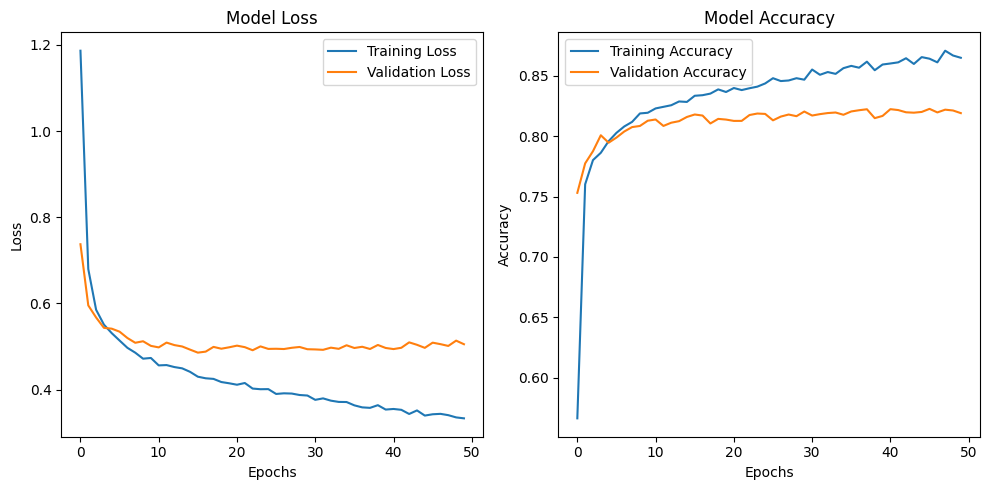

In [91]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [92]:
# Evaluate the fine-tuned model
test_loss, test_accuracy = activity_model.evaluate(X_val, y_val)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

2978/2978 [==============================] - 4s 1ms/step - loss: 0.5055 - accuracy: 0.8191
Test Loss: 0.5055, Test Accuracy: 0.8191


In [93]:
activity_model2 = Sequential([
         Input(shape=(6,)),
         Dense(64, activation='relu'),
        Dense(128, activation='relu'),
        Dropout(0.125),
        Dense(64, activation='relu'),
       
        Dense(32, activation='relu'),
        
        Dense(16, activation='relu'),
        Dense(7, activation='softmax')
    ])

In [94]:
activity_model2.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [95]:
activity_model2.build(input_shape=(None, 6))  # Use an appropriate input shape (None for batch size)

# Print the model summary
activity_model2.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 64)                448       
                                                                 
 dense_37 (Dense)            (None, 128)               8320      
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_38 (Dense)            (None, 64)                8256      
                                                                 
 dense_39 (Dense)            (None, 32)                2080      
                                                                 
 dense_40 (Dense)            (None, 16)                528       
                                                                 
 dense_41 (Dense)            (None, 7)                

Epoch 1/50
166/166 [==============================] - 3s 14ms/step - loss: 1.6448 - accuracy: 0.3895 - val_loss: 1.4282 - val_accuracy: 0.4982
Epoch 2/50
166/166 [==============================] - 2s 13ms/step - loss: 1.3790 - accuracy: 0.4987 - val_loss: 1.2576 - val_accuracy: 0.5193
Epoch 3/50
166/166 [==============================] - 3s 18ms/step - loss: 1.2413 - accuracy: 0.5250 - val_loss: 1.2131 - val_accuracy: 0.5255
Epoch 4/50
166/166 [==============================] - 2s 13ms/step - loss: 1.2041 - accuracy: 0.5394 - val_loss: 1.1932 - val_accuracy: 0.5398
Epoch 5/50
166/166 [==============================] - 2s 13ms/step - loss: 1.1805 - accuracy: 0.5472 - val_loss: 1.1752 - val_accuracy: 0.5499
Epoch 6/50
166/166 [==============================] - 2s 13ms/step - loss: 1.1542 - accuracy: 0.5619 - val_loss: 1.1525 - val_accuracy: 0.5592
Epoch 7/50
166/166 [==============================] - 2s 13ms/step - loss: 1.1387 - accuracy: 0.5684 - val_loss: 1.1337 - val_accuracy: 0.5627

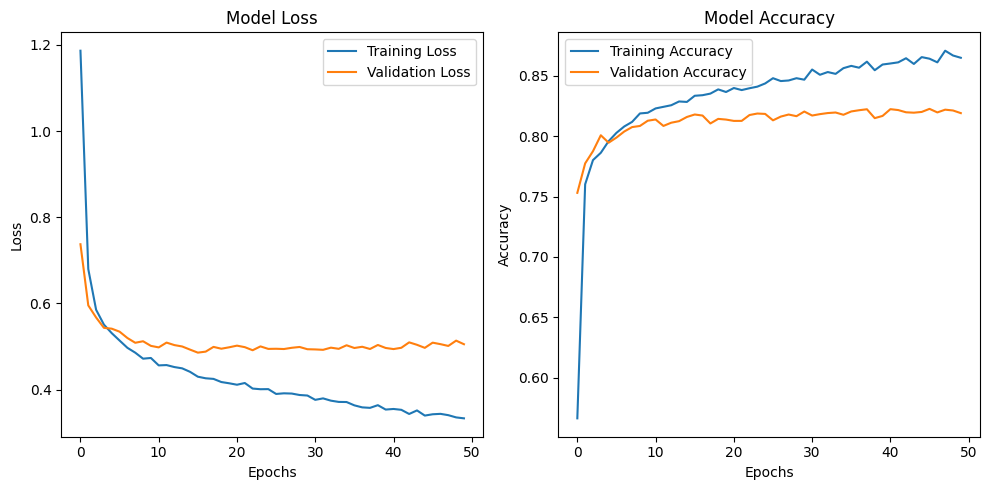

In [96]:
# activity_model2.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))
import matplotlib.pyplot as plt

# Assuming you've trained your model and stored the history in a variable
history2 = activity_model2.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val))

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [97]:
test_loss, test_accuracy = activity_model2.evaluate(X_val, y_val)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

2978/2978 [==============================] - 4s 1ms/step - loss: 0.5469 - accuracy: 0.7957
Test Loss: 0.5469, Test Accuracy: 0.7957


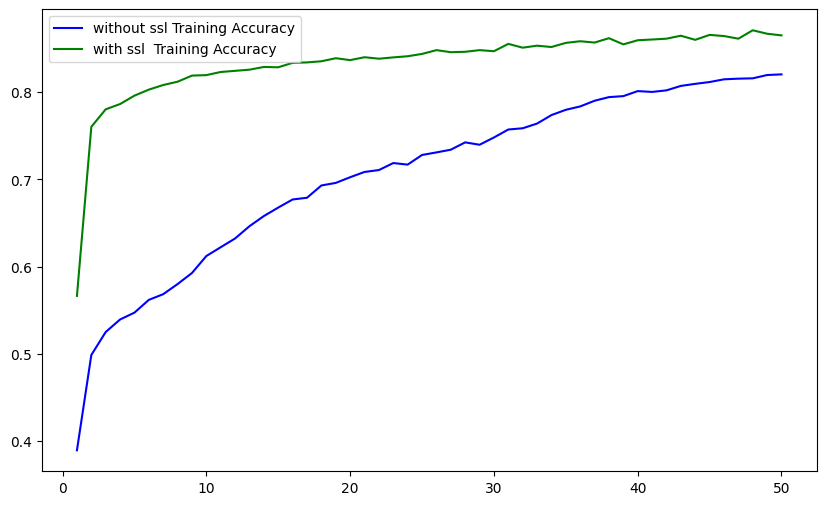

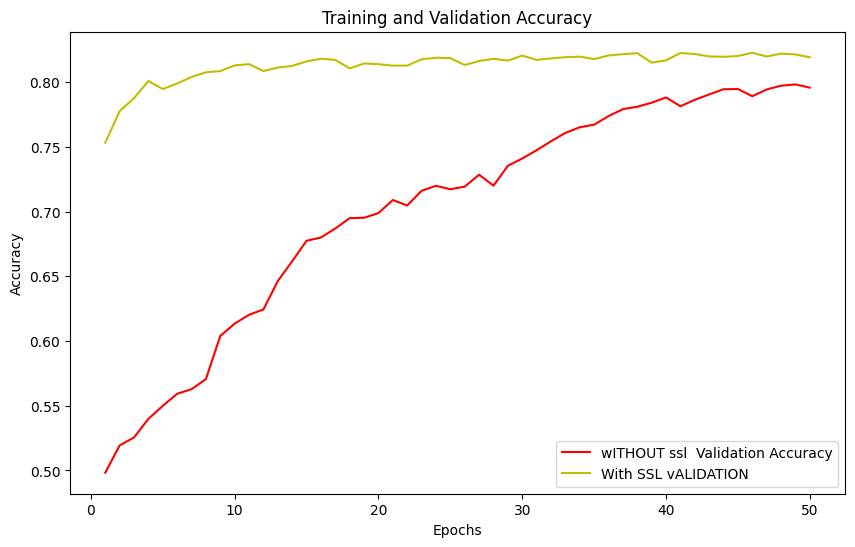

In [98]:
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create a range of epochs
epochs = range(1, len(acc2) + 1)

# Plot training and validation accuracy for both models
plt.figure(figsize=(10, 6))
plt.plot(epochs, acc2, 'b', label='without ssl Training Accuracy')
# plt.plot(epochs, val_acc2, 'r', label='Model 2 Validation Accuracy')
plt.plot(epochs, acc, 'g', label='with ssl  Training Accuracy')
# plt.plot(epochs, val_acc, 'y', label='Model 1 Validation Accuracy')
plt.legend()
plt.figure(figsize=(10, 6))
plt.plot(epochs, val_acc2, 'r', label='wITHOUT ssl  Validation Accuracy')
plt.plot(epochs, val_acc, 'y', label='With SSL vALIDATION')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()